<a href="https://colab.research.google.com/github/ks-chauhan/ML-Learning-and-basics-with-PyTorch/blob/main/torchvision_Linear_Regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn


In [ ]:
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print (torch.__version__)

2.5.1+cu124


In [ ]:
print (torchvision.__version__)

0.20.1+cu124


In [ ]:
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)
test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 9.99MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 171kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.25MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 12.8MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
image,label=train_data[0]

In [ ]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [ ]:
classes=train_data.classes

In [ ]:
classes


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
classes_idx=train_data.class_to_idx

In [ ]:
classes_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets[:100]

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8,
        4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3,
        0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 1,
        6, 3, 1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7, 9, 9, 9, 3, 2, 9, 3, 6,
        4, 1, 1, 8])

Text(0.5, 1.0, 'Ankle boot')

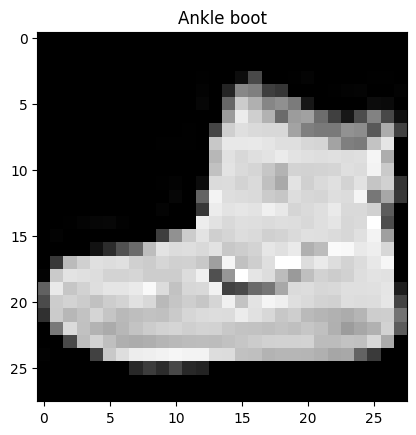

In [ ]:
import matplotlib.pyplot as plt
image,label=train_data[0]
plt.imshow(image.squeeze(),cmap="grey")
plt.title(train_data.classes[label])

In [ ]:
random_idx=torch.randint(0,len(train_data),size=[1]).item()
random_idx

837

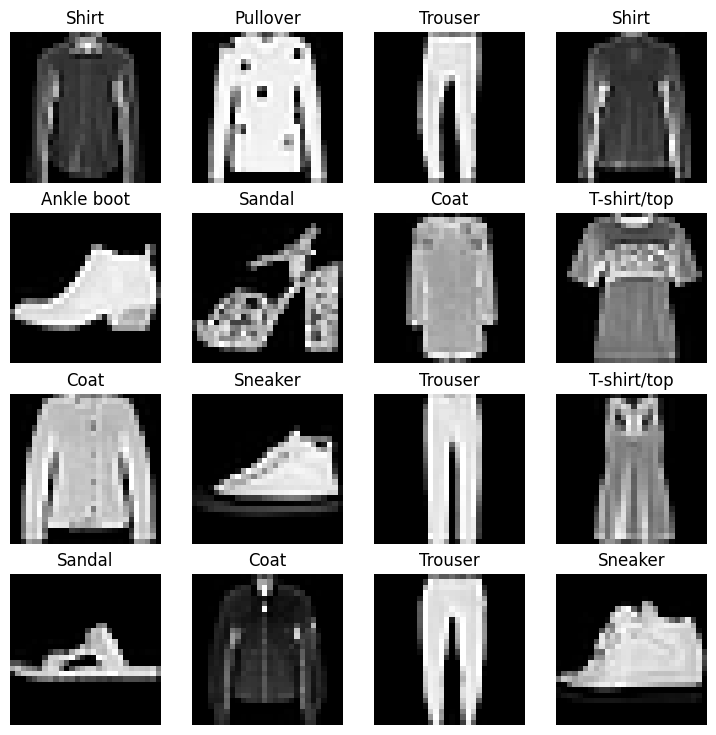

In [ ]:
plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,(rows*cols+1)):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  image,label=train_data[random_idx]
  plt.subplot(rows,cols,i)
  plt.imshow(image.squeeze(),cmap="grey")
  plt.title(train_data.classes[label])
  plt.axis(False)

In [ ]:
from torch.utils.data import DataLoader
train_data_loader=DataLoader(dataset=train_data,
                             batch_size=32,
                             shuffle=True)

In [ ]:
test_data_loader=DataLoader(dataset=test_data,
                            batch_size=32,
                            shuffle=False)

In [ ]:
train_data_loader.batch_size

32

In [ ]:
train_loader_batch,train_loader_label=next(iter(train_data_loader))

In [ ]:
train_loader_batch

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [ ]:
random_idx=torch.randint(0,len(train_loader_batch),size=[1]).item()

In [ ]:
random_idx


18

In [ ]:
img,label=train_loader_batch[random_idx],train_loader_label[random_idx]

(-0.5, 27.5, 27.5, -0.5)

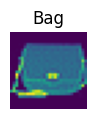

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(img.squeeze())
plt.title(classes[label])
plt.axis(False)

In [ ]:
x=train_loader_batch
flatten_model=nn.Flatten()
output=flatten_model(x)
print(f"shape before flattening = {x.shape}")#[color channels, height, width]
print(f"shape after flattening = {output.shape}")#[color channels, height*width]

shape before flattening = torch.Size([32, 1, 28, 28])
shape after flattening = torch.Size([32, 784])


In [ ]:
class FashionMNISTV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_neurons1:int,
               hidden_neurons2:int,
               hidden_neurons3:int,
               output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_neurons1),
        nn.Linear(in_features=hidden_neurons1,out_features=hidden_neurons2),
        nn.Linear(in_features=hidden_neurons2,out_features=hidden_neurons3),
        nn.ReLU(),
        nn.Linear(in_features=hidden_neurons3,out_features=output_shape),
    )
  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)

In [ ]:
model_0=FashionMNISTV0(input_shape=28*28,
                       hidden_neurons1=8,
                       hidden_neurons2=32,
                       hidden_neurons3=20,
                       output_shape=len(classes))

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0227,  0.0034,  0.0328,  ..., -0.0252,  0.0141,  0.0056],
                      [ 0.0295, -0.0088, -0.0022,  ..., -0.0179, -0.0085, -0.0279],
                      [ 0.0078, -0.0344,  0.0316,  ..., -0.0129,  0.0266, -0.0038],
                      ...,
                      [-0.0108,  0.0323, -0.0296,  ...,  0.0298, -0.0207,  0.0065],
                      [ 0.0336, -0.0270,  0.0154,  ...,  0.0293,  0.0293,  0.0220],
                      [-0.0043, -0.0259,  0.0167,  ..., -0.0217,  0.0054, -0.0023]])),
             ('layer_stack.1.bias',
              tensor([ 0.0174,  0.0264,  0.0216,  0.0105,  0.0015, -0.0125, -0.0001,  0.0267])),
             ('layer_stack.2.weight',
              tensor([[-0.2031, -0.0433, -0.1824,  0.1391, -0.2843,  0.1059,  0.1279,  0.0111],
                      [ 0.0316, -0.0611,  0.1583,  0.2534,  0.0772,  0.2400, -0.2534,  0.3027],
                      [ 0.1315, -0.0709,  0.3452,  0.0454,  0.028

In [ ]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.1183, -0.1803,  0.0667, -0.1091, -0.0915, -0.0033, -0.1906, -0.1965,
          0.0160, -0.0209]], grad_fn=<AddmmBackward0>)

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                           lr=0.025)

In [ ]:
!pip install torchmetrics
from torchmetrics import Accuracy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from timeit import default_timer
def print_train_time(start,
                     end,
                     device:torch.device=None):
  total_time=end-start
  print(f"train time on {device} : {total_time:.3f} seconds")
  return total_time

In [ ]:
len(train_data_loader)

1875

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(18)
starting_timer_training=default_timer()
epochs=4
for epoch in tqdm(range(epochs)):
  print(f"current epoch : {epoch}")
  train_loss=0

  for batch, (X,y) in enumerate(train_data_loader):
    model_0.train()
    pred=model_0(X)
    loss=loss_fn(pred,y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (batch%400) == 0:
      print(f"looked at {(len(X)*batch)}/{(len(train_data_loader.dataset))}")
  train_loss/=len(train_data_loader)
  print(f"train loss : {train_loss}")
ending_timer_training=default_timer()
print_train_time(start=starting_timer_training,end=ending_timer_training)

In [ ]:
from torchmetrics.classification import Accuracy
Accuracy_metric=Accuracy(task="multiclass",num_classes=10)
test_loss,test_accuracy=0,0
model_0.eval()
with torch.inference_mode():
  for X_test,y_test in test_data_loader:
    test_pred=model_0(X_test)
    test_loss+=loss_fn(test_pred,y_test)
    accu=Accuracy_metric((test_pred),y_test)
    test_accuracy+=accu.item()
  test_accuracy/=len(test_data_loader)
  print(f"test accuracy : {test_accuracy}")

test accuracy : 0.827276357827476


In [ ]:
def model_evaluation(model:torch.nn.Module,
                     loss_function:torch.nn.Module,
                     data_loader:torch.utils.data.DataLoader,
                     accu_metric):
  model.eval()
  test_loss,accu=0,0
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      prediction=model(X)
      loss=loss_function(prediction,y)
      test_loss+=loss
      accu+=accu_metric(prediction,y)
    accu/=len(data_loader)
    test_loss/=len(data_loader)
    print(accu,test_loss)



In [ ]:
model_evaluation(model=model_0,
                 loss_function=loss_fn,
                 data_loader=test_data_loader,
                 accu_metric=Accuracy_metric)

  0%|          | 0/313 [00:00<?, ?it/s]

tensor(0.8273) tensor(0.4779)


In [ ]:
((1100)+(1700)+(500))/6,((2000)+(2500)+(500))/6

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"